# Leaky Integrate and Fire (LIF) Neuron Model

$$
\begin{align}
\tau_m\,\frac{d}{dt}\,V(t) &= E_{L} - V(t) + R\,I(t) &\text{if }\quad V(t) \leq V_{th} \\
V(t) &= V_{reset} &\text{otherwise}
\end{align}
$$

$\tau_m$ : Membrane Time Constant  
$V(t)$ : Membrane Potential  
$E_{L}$ : Leak Potential  
$R$ : Membrane Resistance  
$I(t)$ : Synaptic Input Current  
$V_{th}$ : Firing Threshold  
$V_{reset}$ : Reset Voltage

In [1]:
"""Simulation Parameters"""
t_max = 150e-3 # second
dt = 1e-3      # second
tau = 20e-3    # second
el = -60e-3    # milivolt
vr = -70e-3    # milivolt
vth = -50e-3   # milivolt
r = 100e6      # ohm
i_mean = 25e-11 # amphere

## $I(t)$: Simulating Synaptic Input with a Sinusoidal Model

\begin{equation}
I(t)=I_{mean}\left(1+\sin\left(\frac{2 \pi}{0.01}\,t\right)\right)
\end{equation}

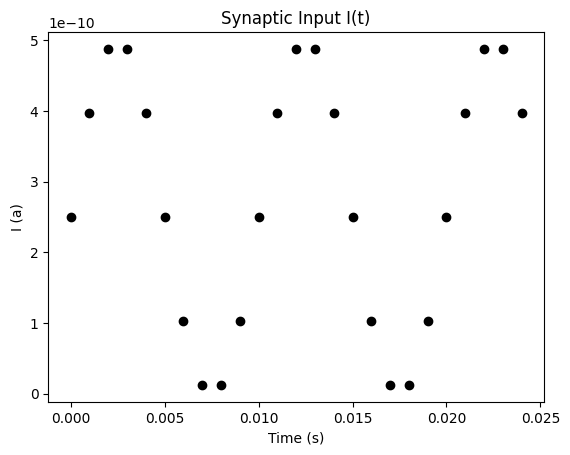

In [2]:
import numpy as np
from matplotlib import pyplot as plt

step_end = 25

plt.figure()
plt.title("Synaptic Input I(t)")
plt.ylabel("I (a)")
plt.xlabel("Time (s)")

for step in range(step_end):
    t = step * dt
    i = i_mean * (1 + np.sin(t * 2 * np.pi / 0.01))
    plt.plot(t, i, "ko")

plt.show()

## $V(t)$: Simulating Membrane Potential using Discrete Time Integration

$$
\begin{align}
\tau_m\,\frac{V\left(t+\Delta t\right)-V\left(t\right)}{\Delta t} = E_{L} - V(t) + R\,I(t) \\
V(t + \Delta t) =  V(t) + \frac{\Delta t}{\tau_m}\left( E_L -V(t) + R I(t) \right)
\end{align}
$$

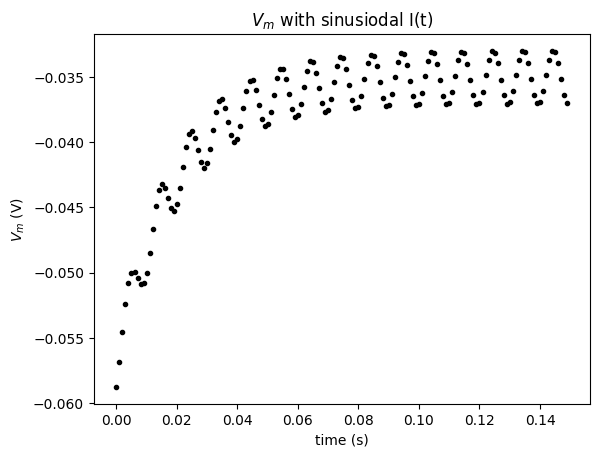

In [3]:
step_end = int(t_max / dt)

plt.figure()
plt.title("$V_m$ with sinusiodal I(t)")
plt.xlabel("time (s)")
plt.ylabel('$V_m$ (V)')


# Initialize v0
v = el

for step in range(step_end):
  t = step * dt
  i = i_mean * (1 + np.sin(t * 2 * np.pi / 0.01))
  v = v + dt/tau * (el - v + r*i)
  plt.plot(t, v, "k.")

plt.show()

## Randomizing Synaptic Input

$$
\begin{equation}
I(t) = I_{mean}\left(1+0.1\sqrt{\frac{t_{max}}{\Delta t}}\,\xi(t)\right)\qquad\text{with }\xi(t)\sim \mathcal{U}(-1,1)
\end{equation}
$$

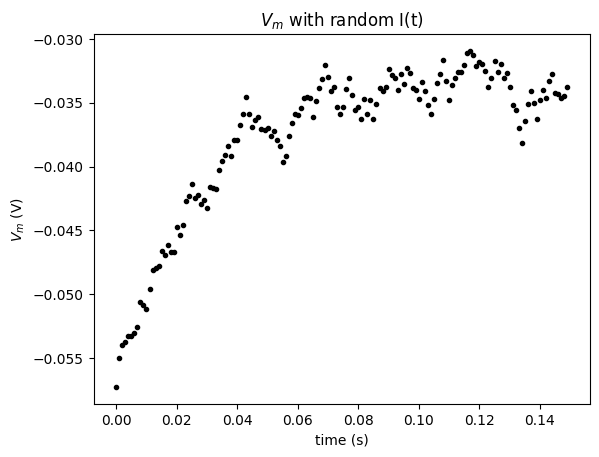

In [4]:
np.random.seed(2020)

step_end = int(t_max / dt)
v = el

plt.figure()
plt.title("$V_m$ with random I(t)")
plt.xlabel("time (s)")
plt.ylabel("$V_m$ (V)")

for step in range(step_end):
  t = step * dt
  random_num = np.random.random() * 2 - 1
  i = i_mean * (1 + 0.1 * random_num * np.sqrt(t_max / dt))
  v = v + dt/tau * (el - v + r*i)

  plt.plot(t, v, "k.")

plt.show()

## Ensemble Statistics

$$
\begin{align}
\left\langle V(t)\right\rangle &= \frac{1}{N}\sum_{n=1}^N V_n(t) & & \text{sample mean}\\
\left\langle (V(t)-\left\langle V(t)\right\rangle)^2\right\rangle &= \frac{1}{N-1} \sum_{n=1}^N \left(V_n(t)-\left\langle V(t)\right\rangle\right)^2 & & \text{sample variance} \\
\left\langle \left(V(t)-\left\langle V(t)\right\rangle\right)\left(V(s)-\left\langle V(s)\right\rangle\right)\right\rangle
&= \frac{1}{N-1} \sum_{n=1}^N \left(V_n(t)-\left\langle V(t)\right\rangle\right)\left(V_n(s)-\left\langle V(s)\right\rangle\right) & & \text{sample autocovariance}
\end{align}
$$

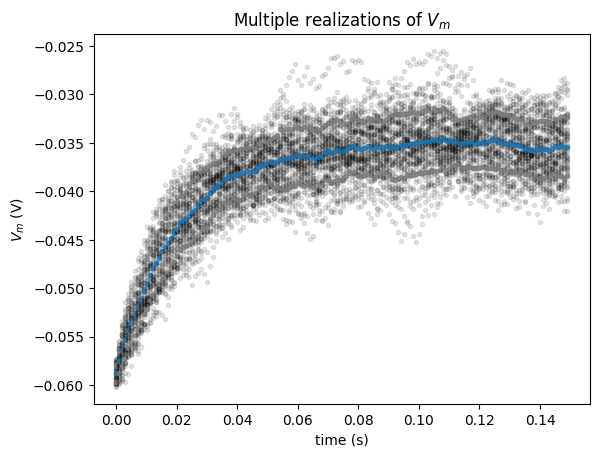

In [10]:
np.random.seed(2020)

step_end = int(t_max / dt)
n = 50
# ensemble statistics
v_n = [el] * n

plt.figure()
plt.title("Multiple realizations of $V_m$")
plt.xlabel("time (s)")
plt.ylabel("$V_m$ (V)")

for step in range(step_end):
  t = step * dt
  # loop for n simulations
  for j in range(0, n):
    # compute randomized synaptic input for this simulation
    i = i_mean * (1 + 0.1 * np.sqrt(t_max/dt) * (2 * np.random.random() - 1))
    # compute membrane potential for this simulation
    v_n[j] = v_n[j] + dt/tau * (el - v_n[j] + r*i)
  # plot simulations
  plt.plot([t] * n, v_n, "k.", alpha=0.1)
  # plot sample mean
  v_mean = sum(v_n) / n
  plt.plot(t, v_mean, "C0.", alpha=0.8)

  # compute sample variance
  v_var_n = [(v_mean - x)**2 for x in v_n]
  v_var = sum(v_var_n) / (n - 1)
  # compute standard deviation
  v_std = np.sqrt(v_var)

  # plot standard deviation
  plt.plot(t, v_mean + v_std, "C7.", alpha=0.8)
  plt.plot(t, v_mean - v_std, "C7.", alpha=0.8)

plt.show()

### Rewrite using NumPy

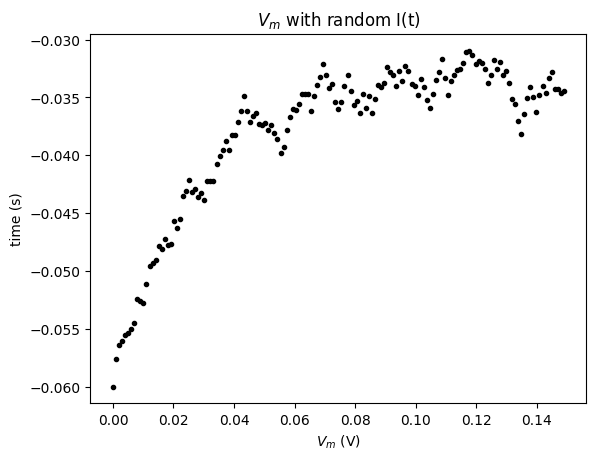

In [23]:
np.random.seed(2020)

step_end = int(t_max / dt) - 1
t_range = np.linspace(0, t_max, num=step_end, endpoint=False)
v = el * np.ones(step_end)

i = i_mean * (1 + 0.1 * np.sqrt(t_max/dt) * (2 * np.random.random(step_end) - 1))

for step, i_step in enumerate(i):
  if step == 0:
    continue

  v[step] = v[step - 1] + dt/tau * (el - v[step - 1] + r*i_step)

plt.figure()
plt.title('$V_m$ with random I(t)')
plt.ylabel('time (s)')
plt.xlabel('$V_m$ (V)')

plt.plot(t_range, v, "k.")
plt.show()

### Using 2D arrays

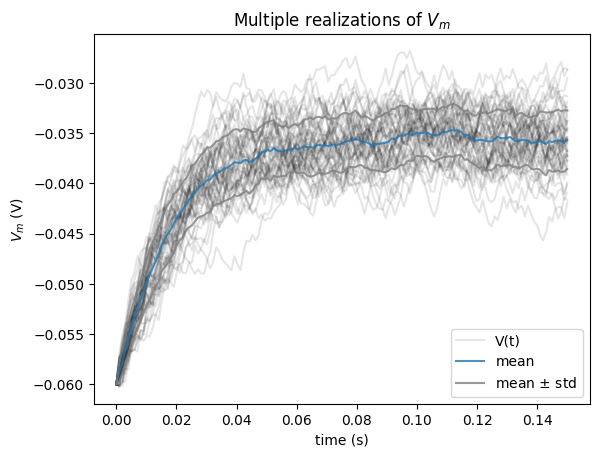

In [ ]:
np.random.seed(2020)

step_end = int(t_max / dt)
n = 50
t_range = np.linspace(0, t_max, num=step_end)
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * np.sqrt(t_max / dt) * (2 * np.random.random([n, step_end]) - 1))

for step in range(1, step_end):
    v_n[:, step] = v_n[:, step - 1] + dt / tau * (
        el - v_n[:, step - 1] + r * i[:, step]
    )

v_mean = np.mean(v_n, axis=0)
v_std = np.std(v_n, axis=0)

plt.figure()
plt.title("Multiple realizations of $V_m$")
plt.xlabel("time (s)")
plt.ylabel("$V_m$ (V)")
plt.plot(t_range, v_n.T, "k", alpha=0.1)

plt.plot(t_range, v_n[-1], "k", alpha=0.1, label="V(t)")
plt.plot(t_range, v_mean, "C0", alpha=0.8, label="mean")
plt.plot(t_range, v_mean+v_std, "C7", alpha=0.8)
plt.plot(t_range, v_mean-v_std, "C7", alpha=0.8, label=r"mean $\pm$ std")

plt.legend()
plt.show()